## Finding roots of functions

Let $f:X \rightarrow \mathbb{R}$ be a function, we are interested in finding the root of $f$ in an interval $[a, b]$

### Importing libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("science")
import math

### Function with a root

In [2]:
def func(x):
    return x ** 2 - 4 * x + 1

In [3]:
def dfunc(x):
    return 2 * x - 4

In [4]:
xs = np.linspace(-4, 2, 100)
fxs = [func(x) for x in xs]

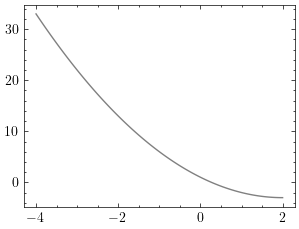

In [5]:
plt.plot(xs, fxs, color = "grey")
plt.show()

### Bisection method

The bisection method is an iterrative binary search method:

1. calculate the midpoint of the interval $c = (a + b)/ 2$
2. calculate $f(c)$
3. If convergence return c
4. search in $[a, c]$ or $[c, b]$ depending on the sign of $f(c)$

In [6]:
def bisection_method(fn, a, b, itermax = 1000, eps = 1e-3):
    assert(fn(a) * fn(b) < 0)
    hist = []
    for epoch in range(itermax):
        # calculate the midpoint of the interval
        c = (a + b) / 2.
        hist += [c]
        # calculate f(c)
        fc = fn(c)
        # Check for convergence
        if abs(fc) < eps:
            print("Convergence at epoch {}".format(epoch))
            return (c, hist)
        # search in [a, c] or [c, b]
        if fc * fn(a) < 0:
            b = c
        else:
            a = c
    return c, hist

In [7]:
res = bisection_method(func, -4, 2)

Convergence at epoch 12


In [8]:
print("The root of func is {:.2}".format(res[0]))

The root of func is 0.27


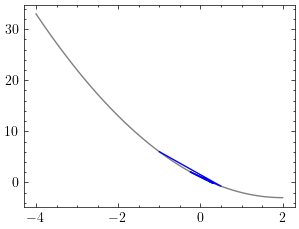

In [9]:
plt.plot(xs, fxs, color = "grey")
plt.plot(res[1], [func(x) for x in res[1]], color = "blue")
plt.show()

### False position method

1. Calculate $c = \dfrac{af(b) - bf(a)}{f(b) - f(a)}$
2. Calculate f(c)
3. If convergence, return c
4. Else search in $[a, c]$ or $[a, b]$ depending on the sign of $f(c)$

In [10]:
def false_point_method(fn, a, b, itermax = 1000, eps = 1e-3):
    assert(fn(a) * fn(b) < 0)
    hist = []
    for epoch in range(itermax):
        fa = fn(a)
        fb = fn(b)
        c = (a * fb - b * fa) / (fb - fa + 1e-5)
        hist += [c]
        fc = fn(c)
        # Check for convergence
        if abs(fc) < eps:
            print("Convergence at epoch {}".format(epoch))
            return c, hist
        if fa * fc < 0:
            b = c
        else:
            a = c
    return c, hist

In [11]:
res = false_point_method(func, -4, 2)

Convergence at epoch 15


In [12]:
print("The root of func is {:.2}".format(res[0]))

The root of func is 0.27


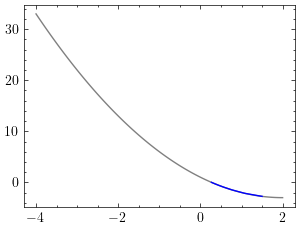

In [13]:
plt.plot(xs, fxs, color = "grey")
plt.plot(res[1], [func(x) for x in res[1]], color = "blue")
plt.show()

### Newton-Raphson method

1. Choose a random value for $x_0$
2. Calculate $x_{n + 1} = x_n - \dfrac{f(x_n)}{f'(x_n)}$
3. If convergence, return $x_{n+1}$

In [14]:
def newton_raphson_method(fn, dfn, itermax = 1000, eps = 1e-5):
    x = np.random.rand()
    hist = [x]
    for epoch in range(itermax):
        x = x - fn(x) / (dfn(x) + 1e-6)
        hist += [x]
        # Check for convergence
        if abs(fn(x)) < eps:
            print("Convergence at epoch {}".format(epoch))
            return x, hist
    return c, hist

In [15]:
res = newton_raphson_method(func, dfunc)

Convergence at epoch 1


In [16]:
print("The root of func is {:.2}".format(res[0]))

The root of func is 0.27


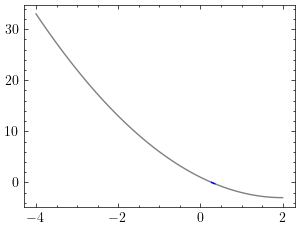

In [17]:
plt.plot(xs, fxs, color = "grey")
plt.plot(res[1], [func(x) for x in res[1]], color = "blue")
plt.show()

### Secant method

1. Choose a random value for $x_0$ and $x_1$
2. Calculate $x_{n + 1} = x_n - f(x_n)\dfrac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$
3. If convergence, return $x_{n+1}$

In [18]:
def newton_raphson_method(fn, a, b, itermax = 1000, eps = 1e-5):
    x0 = a
    x1 = b
    hist = []
    for epoch in range(itermax):
        xn = x1 - fn(x1) * (x1 - x0)/ (fn(x1) - fn(x0) + 1e-6)
        hist += [xn]
        # Check for convergence
        if abs(fn(xn)) < eps:
            print("Convergence at epoch {}".format(epoch))
            return xn, hist
        x0 = x1
        x1 = xn
    return xn, hist

In [19]:
res = newton_raphson_method(func, -4, 2)

Convergence at epoch 8


In [20]:
print("The root of func is {:.2}".format(res[0]))

The root of func is 0.27


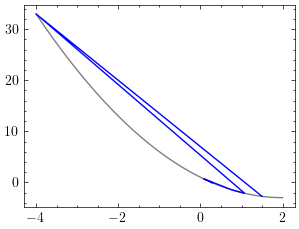

In [21]:
plt.plot(xs, fxs, color = "grey")
plt.plot(res[1], [func(x) for x in res[1]], color = "blue")
plt.show()

### scipy

In [22]:
from scipy.optimize import newton, bisect

In [23]:
print("The root of func is {:.2}".format(bisect(func, -4, 2)))

The root of func is 0.27


In [24]:
print("The root of func is {:.2}".format(newton(func, 0, dfunc)))

The root of func is 0.27
